# Testing the Best Autoencoder trained in tag 2
John Ignacio R.M. 2020-06-17

This time a new model is going to be trained, one that does not overfit and obtains better evaluation metrics.

In [15]:
#ada
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada import get_trainvaltest_from_csv, Autoencoder

#libs
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Dropout
from keras.regularizers import l1
from keras.models import Model
from keras.optimizers import adam, adagrad, adamax

from sklearn.metrics import precision_recall_curve, confusion_matrix
import seaborn as sns

In [5]:
data_path = "../processed_data"
signal = "Xtohh2000"
seed = 42

In [6]:
sets = get_trainvaltest_from_csv(data_path, signal, .6, .2, .2, seed, region = "SR", tag = 2)
x_train, x_val, x_test = sets["x"].values()
y_train, y_val, y_test = sets["y"].values()
w_train, w_val, w_test = sets["w"].values()
print(x_train.shape, x_val.shape, x_test.shape)

(5241, 14) (1748, 14) (1748, 14)


In [7]:
#dividing the classes
x_train_0 = x_train[y_train == 0]
x_train_1 = x_train[y_train == 1]
w_train_0 = w_train[(y_train == 0).ravel()]
w_train_1 = w_train[(y_train == 1).ravel()]

x_val_0 = x_val[y_val == 0]
x_val_1 = x_val[y_val == 1]
w_val_0 = w_val[(y_val == 0).ravel()]
w_val_1 = w_val[(y_val == 1).ravel()]

x_test_0 = x_test[y_test == 0]
x_test_1 = x_test[y_test == 1]
w_test_0 = w_test[(y_test == 0).ravel()]
w_test_1 = w_test[(y_test == 1).ravel()]

print(x_train_1.shape, x_val_1.shape, x_test_1.shape)

(5140, 14) (1713, 14) (1707, 14)


## A7: Adamax

In [5]:
class Autoencoder7(Autoencoder):

    def __init__(self, n_features):
        input_layer = Input(shape=(n_features, ))
        encoder_1 = Dense(8, kernel_initializer='he_uniform',activation='relu')(input_layer)
        drop_1 = Dropout(rate=0.2)(encoder_1)
        encoder_2 = Dense(2, kernel_initializer='he_uniform',activation='relu')(drop_1)
        drop_2 = Dropout(rate=0.2)(encoder_2)
        decoder_2 = Dense(8, kernel_initializer='he_uniform',activation='relu')(drop_2)#drop_4)
        drop_5 = Dropout(rate=0.1)(decoder_2)
        output_layer = Dense(n_features, activation="sigmoid")(drop_5)
        self.model = Model(inputs=input_layer, outputs=output_layer)

        #compile
        self.model.compile(loss='mean_squared_error', optimizer=adamax(lr=0.01), metrics = ["acc"])

        #title
        self.title = 'optimizer: adam , lr = 0.01, loss = mean squared error'

        #training
        self.history = None

        #name
        self.model_name = "A7"

In [6]:
a7 = Autoencoder7(x_train_1.shape[1])
a7.fit(x_train_1, w_train_1, x_val_1, w_val_1, 150)

-04 - val_acc: 0.2697
Epoch 61/150
5138/5138 [==============================] - 1s 112us/step - loss: 9.9685e-04 - acc: 0.2450 - val_loss: 9.6792e-04 - val_acc: 0.2673
Epoch 62/150
5138/5138 [==============================] - 1s 119us/step - loss: 9.9923e-04 - acc: 0.2480 - val_loss: 9.6816e-04 - val_acc: 0.2697
Epoch 63/150
5138/5138 [==============================] - 1s 117us/step - loss: 9.9968e-04 - acc: 0.2489 - val_loss: 9.6681e-04 - val_acc: 0.2709
Epoch 64/150
5138/5138 [==============================] - 1s 121us/step - loss: 9.9566e-04 - acc: 0.2528 - val_loss: 9.6791e-04 - val_acc: 0.2679
Epoch 65/150
5138/5138 [==============================] - 1s 119us/step - loss: 9.9652e-04 - acc: 0.2540 - val_loss: 9.6860e-04 - val_acc: 0.2679
Epoch 66/150
5138/5138 [==============================] - 1s 115us/step - loss: 9.9610e-04 - acc: 0.2431 - val_loss: 9.6698e-04 - val_acc: 0.2703
Epoch 67/150
5138/5138 [==============================] - 1s 123us/step - loss: 9.9584e-04 - acc: 0.24

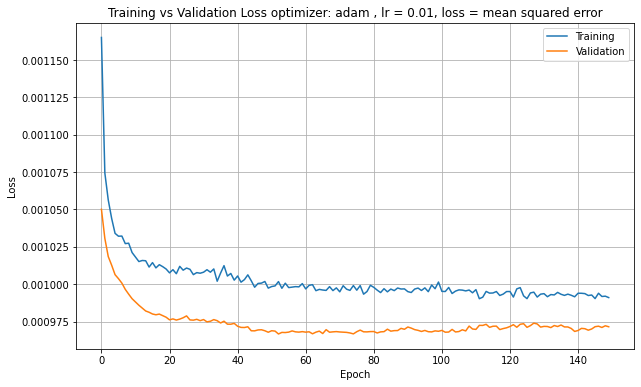

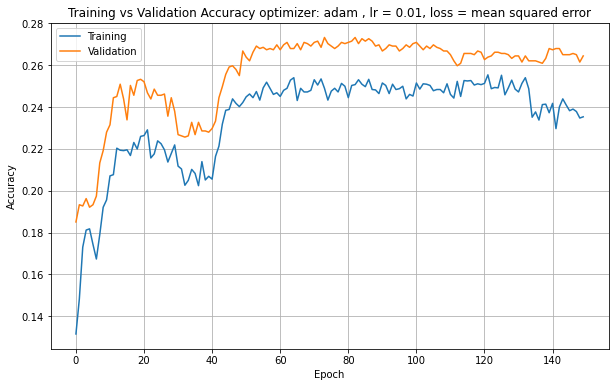

1720/1720 [==============================] - 0s 15us/step


(0.875717194135799, 0.2848837077617645)

In [7]:
a7.plot_loss()
a7.plot_acc()
a7.evaluate(x_test_1)

In [8]:
a7.save(data_path, "2020-06-17")

modelo
modelo
historia
mas historia


## A9: Less neurons

In [20]:
class Autoencoder9(Autoencoder):

    def __init__(self, n_features):

        #input
        input_layer = Input(shape=(n_features, ))

        #encode
        encoder = Dense(8, kernel_initializer='he_uniform',activation='relu')(input_layer)
        drop = Dropout(rate=0.2)(encoder)

        #latent
        latent = Dense(1, kernel_initializer='he_uniform',activation='relu')(drop)
        drop = Dropout(rate=0.2)(latent)

        #decode
        decoder = Dense(8, kernel_initializer='he_uniform',activation='relu')(drop)#drop_4)
        drop = Dropout(rate=0.1)(decoder)

        #output
        output_layer = Dense(n_features, activation="sigmoid")(drop)
        self.model = Model(inputs=input_layer, outputs=output_layer)

        #compile
        self.model.compile(loss='mean_squared_error', optimizer=adamax(lr=0.01), metrics = ["acc"])

        #title
        self.title = 'optimizer: adamax , lr = 0.01, loss = mean squared error'

        #training
        self.history = None

        #name
        self.model_name = "A9"

In [21]:
a9 = Autoencoder9(x_train_1.shape[1])
a9.fit(x_train_1, w_train_1, x_val_1, w_val_1, 150)

.1246
Epoch 9/150
5138/5138 [==============================] - 1s 112us/step - loss: 0.0010 - acc: 0.1181 - val_loss: 0.0010 - val_acc: 0.1369
Epoch 10/150
5138/5138 [==============================] - 1s 117us/step - loss: 0.0010 - acc: 0.1281 - val_loss: 0.0010 - val_acc: 0.1298
Epoch 11/150
5138/5138 [==============================] - 1s 109us/step - loss: 0.0010 - acc: 0.1325 - val_loss: 0.0010 - val_acc: 0.1616
Epoch 12/150
5138/5138 [==============================] - 1s 115us/step - loss: 0.0010 - acc: 0.1526 - val_loss: 0.0010 - val_acc: 0.1551
Epoch 13/150
5138/5138 [==============================] - 1s 112us/step - loss: 0.0010 - acc: 0.1475 - val_loss: 0.0010 - val_acc: 0.1675
Epoch 14/150
5138/5138 [==============================] - 1s 113us/step - loss: 0.0010 - acc: 0.1489 - val_loss: 0.0010 - val_acc: 0.1663
Epoch 15/150
5138/5138 [==============================] - 1s 119us/step - loss: 0.0010 - acc: 0.1728 - val_loss: 0.0010 - val_acc: 0.1663
Epoch 16/150
5138/5138 [=====

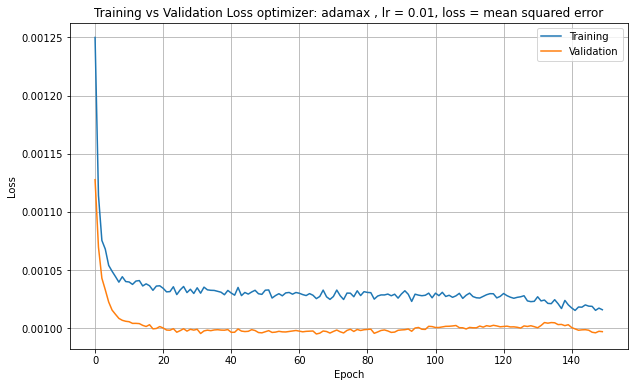

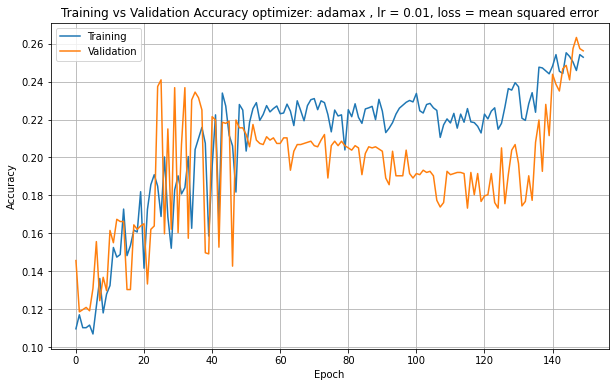

1720/1720 [==============================] - 0s 19us/step


(0.9000330822412358, 0.2866279184818268)

In [22]:
a9.plot_loss()
a9.plot_acc()
a9.evaluate(x_test_1)

In [23]:
a9.save(data_path, "2020-06-17")

modelo
modelo
historia
mas historia


## A10

In [17]:
class Autoencoder10(Autoencoder):

    def __init__(self, n_features):

        #input
        input_layer = Input(shape=(n_features, ))

        #encode
        encoder = Dense(10,kernel_initializer='he_uniform',activation='relu')(input_layer)
        drop = Dropout(rate=0.2)(encoder)

        #latent
        latent = Dense(3, kernel_initializer='he_uniform',activation='relu')(drop)
        drop = Dropout(rate=0.2)(latent)

        #decode
        decoder = Dense(10, kernel_initializer='he_uniform',activation='relu')(drop)
        drop = Dropout(rate=0.2)(decoder)

        #output
        output_layer = Dense(n_features, activation="sigmoid")(drop)
        self.model = Model(inputs=input_layer, outputs=output_layer)

        #compile
        self.model.compile(loss='mean_squared_error', optimizer=adam(lr=0.01), metrics = ["acc"])

        #title
        self.title = 'optimizer: adamax , lr = 0.01, loss = mean squared error'

        #training
        self.history = None

        #name
        self.model_name = "A10"

In [18]:
a10 = Autoencoder10(x_train_1.shape[1])
a10.fit(x_train_1, w_train_1, x_val_1, w_val_1, 200)

oss: 8.8740e-04 - val_acc: 0.3255
Epoch 64/200
5138/5138 [==============================] - 0s 49us/step - loss: 9.3757e-04 - acc: 0.2879 - val_loss: 8.8519e-04 - val_acc: 0.3179
Epoch 65/200
5138/5138 [==============================] - 0s 44us/step - loss: 9.3090e-04 - acc: 0.2953 - val_loss: 8.8232e-04 - val_acc: 0.3108
Epoch 66/200
5138/5138 [==============================] - 0s 43us/step - loss: 9.2705e-04 - acc: 0.2877 - val_loss: 8.8427e-04 - val_acc: 0.3102
Epoch 67/200
5138/5138 [==============================] - 0s 43us/step - loss: 9.3085e-04 - acc: 0.2972 - val_loss: 8.8483e-04 - val_acc: 0.3190
Epoch 68/200
5138/5138 [==============================] - 0s 51us/step - loss: 9.3121e-04 - acc: 0.2943 - val_loss: 8.8977e-04 - val_acc: 0.3273
Epoch 69/200
5138/5138 [==============================] - 0s 43us/step - loss: 9.2995e-04 - acc: 0.2906 - val_loss: 8.8168e-04 - val_acc: 0.3073
Epoch 70/200
5138/5138 [==============================] - 0s 44us/step - loss: 9.2787e-04 - acc:

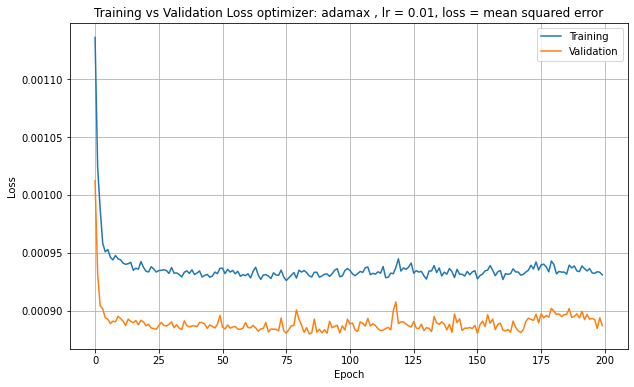

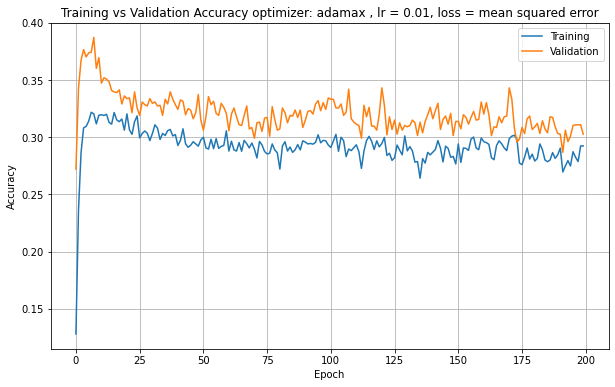

1720/1720 [==============================] - 0s 5us/step


(0.7940113242282424, 0.3139534890651703)

In [19]:
a10.plot_loss()
a10.plot_acc()
a10.evaluate(x_test_1)

In [20]:
#a10.save(data_path, "2020-06-17")

modelo
modelo
historia
mas historia


## Testing

In [20]:
test_scores = a10.model.predict(x_test)
test_mse = np.mean(np.power(x_test - test_scores, 2), axis=1)

error_test = pd.DataFrame({'Reconstruction_error': test_mse, 'True_class': y_test.ravel()})
display(error_test)
error_test = error_test.reset_index()
groups = error_test.groupby('True_class')

,Reconstruction_error,True_class
0,1.136500,1
1,0.510683,1
2,0.516263,1
3,0.361528,1
4,1.601972,1
...,...,...
1743,0.346001,1
1744,0.701125,1
1745,0.410623,1
1746,0.519393,1


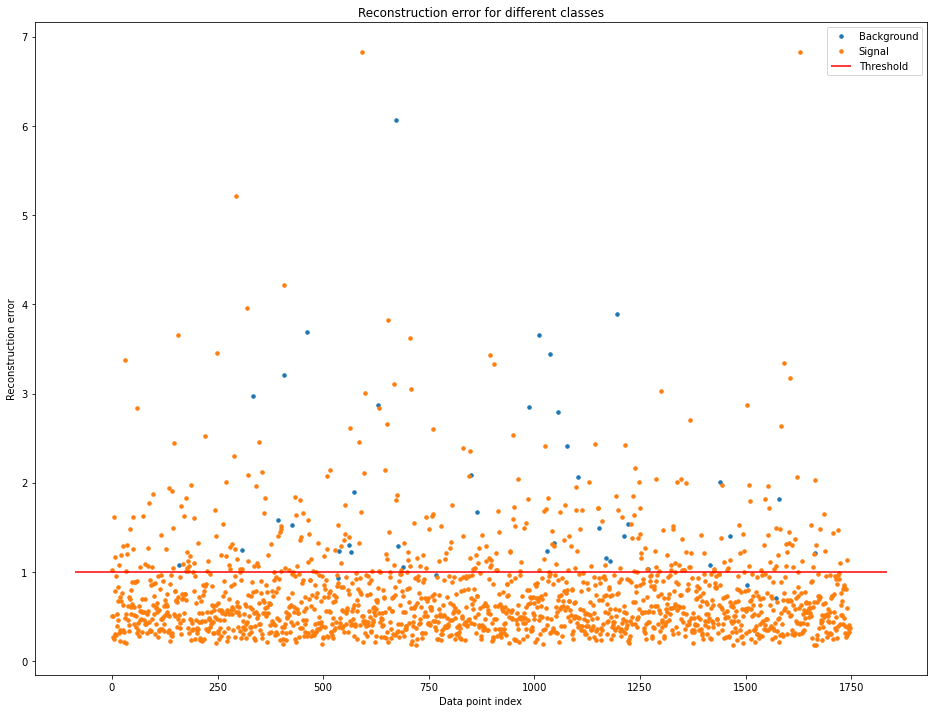

In [11]:
threshold_fixed = 1.0
fig, ax = plt.subplots(figsize=(16, 12))
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='', label= "Background" if name == 0 else "Signal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

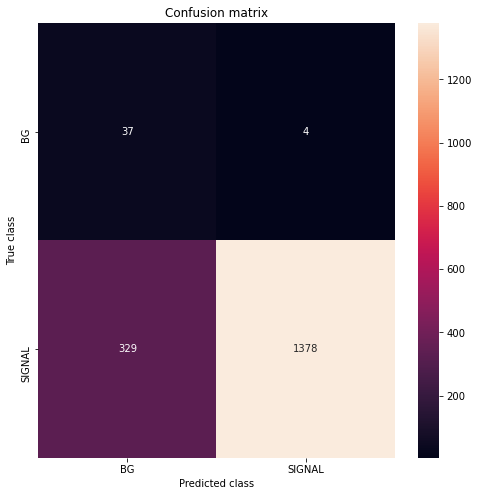

In [16]:
pred_y = [0 if e > threshold_fixed else 1 for e in error_test.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_test.True_class, pred_y)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=["BG", "SIGNAL"], yticklabels=["BG", "SIGNAL"], annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
#recall 80%